# Montes Claros intrusion of Goias Alkaline Province map

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import string as st
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import pandas as pd
import cartopy.crs as crt

In [3]:
notebook_name = 'Montes_Claros_intrusion_map.ipynb'

#### Open a dictionary

In [4]:
#data_set = dict()

#### Saving files

In [5]:
saved_files = []

AttributeError: 'GeoAxesSubplot' object has no attribute 'countrylines'

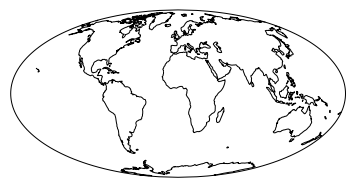

In [12]:
ax = plt.axes(projection=crt.Mollweide())
ax.coastlines()
ax.countrylines()

# Save the plot by calling plt.savefig() BEFORE plt.show()
#plt.savefig('coastlines.pdf')
#plt.savefig('coastlines.png')

plt.show()

In [ ]:
çççççççççççççççççççççççççççççççççççç

## Loading real data for Diorama complex

### Columns to load and filename

In [ ]:
filename = 'data_filtered_XYZ_area_40'

In [ ]:
names = ['X','Y','GPSALT','MAGRAW','MAGIGRF','IGRF','LONG','LAT']

### Real data

In [ ]:
data = pd.read_csv(filename,usecols=(0,1,2,3,4,5,6,7),na_values= '*',
                   names=names,skipinitialspace=True,delim_whitespace=True).dropna(axis=0)

## Properties of survey

### Total field anomaly 

In [ ]:
data_set['tfa_40'] = data.iloc[:,4].get_values()

#### Observation coordinates

In [ ]:
data_set['x'] = data.iloc[:,1].get_values()

In [ ]:
data_set['y'] = data.iloc[:,0].get_values()

In [ ]:
data_set['height'] = -100.

In [ ]:
data_set['z'] = data_set['height']*np.ones_like(data_set['x'])

#### Survey information

In [ ]:
data_set['N'] = np.size(data_set['tfa_40'])

In [ ]:
data_set['dx'] = data_set['x'][0] - data_set['x'][1]

In [ ]:
Nx = abs(int(((data_set['x'].max() - data_set['x'].min())/(data_set['dx']))))

In [ ]:
Ny = data_set['N']/Nx

In [ ]:
data_set['dy'] = abs(int(((data_set['y'].max() - data_set['y'].min())/(Ny-1))))

In [ ]:
data_set['shape'] = Nx,Ny

In [ ]:
print 'Shape : (%.0f,%.0f)'% data_set['shape'] 
print 'Number of data: %.1f' % data_set['N']
print 'dx: %.1f m' % data_set['dx']
print 'dy: %.1f m ' % data_set['dy']

#### Main field

In [ ]:
inc_gf = -19.5

In [ ]:
dec_gf = -18.5

In [ ]:
data_set['main_field'] = inc_gf,dec_gf 

In [ ]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

## Real data visualization for Montes claros complex

In [ ]:
title_font = 20
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)
plt.style.use('ggplot')

plt.tricontourf(data_set['y'],data_set['x'],data_set['tfa_40'],30, cmap='viridis')
data_set['y'],data_set['x']
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('TFA (Montes Claros complex) ', fontsize=title_font)
plt.xlim(data_set['y'].min(),data_set['y'].max())
plt.ylim(data_set['x'].min(),data_set['x'].max())
plt.tick_params(labelsize=13)

file_name = 'figs/data_montes_claros'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=400)
saved_files.append(file_name+'.eps')

plt.show()

### Observation Coordinates

In [ ]:
title_font = 20
bottom_font = 16
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(8,8), tight_layout=True)
plt.style.use('ggplot')

plt.tricontourf(data_set['y'],data_set['x'],data_set['tfa_40'],30, cmap='viridis')
plt.plot(data_set['y'],data_set['x'],'k.')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT')
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('TFA (Montes Claros complex) ', fontsize=title_font)
plt.xlim(data_set['y'].min(),data_set['y'].max())
plt.ylim(data_set['x'].min(),data_set['x'].max())
plt.tick_params(labelsize=13)

file_name = 'figs/RTP_data_montes_claros'
plt.savefig(file_name+'.png',dpi=400)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=400)
saved_files.append(file_name+'.eps')

plt.show()

## Generating .pickle file

In [ ]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
data_set['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [ ]:
file_name = 'data/data_set.pickle'
with open(file_name, 'w') as f:
    pickle.dump(data_set, f)
    
saved_files.append(file_name)

## Saved files

In [ ]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))